<a href="https://colab.research.google.com/github/KSharif/pattons-lab-training-prgrams/blob/main/Linear_alegbra_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear alegbra problem 1 **


**Segment 1: Data Structures for Algebra**

---



What Linear Algebra Is
A Brief History of Algebra
Tensors
Scalars
Vectors and Vector Transposition
Norms and Unit Vectors
Basis, Orthogonal, and Orthonormal Vectors
Arrays in NumPy
Matrices
Tensors in TensorFlow and PyTorch
Segment 2: Common Tensor Operations

Tensor Transposition
Basic Tensor Arithmetic
Reduction
The Dot Product
Solving Linear Systems
Segment 3: Matrix Properties

The Frobenius Norm
Matrix Multiplication
Symmetric and Identity Matrices
Matrix Inversion
Diagonal Matrices
Orthogonal Matrices
Segment 1: Data Structures for Algebra
Slides used to begin segment, with focus on introducing what linear algebra is, including hands-on paper and pencil exercises.

What Linear Algebra Is

**Segment 1: Data Structures for Algebra**

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
t = np.linspace(0, 40, 1000) # start, finish , n points

Distance travelled by robber: d = 2.5t


In [4]:
d_r = 2.5 * t

Distance travelled by police: d = 3(t -5 )

In [5]:
d_s = 3 * (t-5)

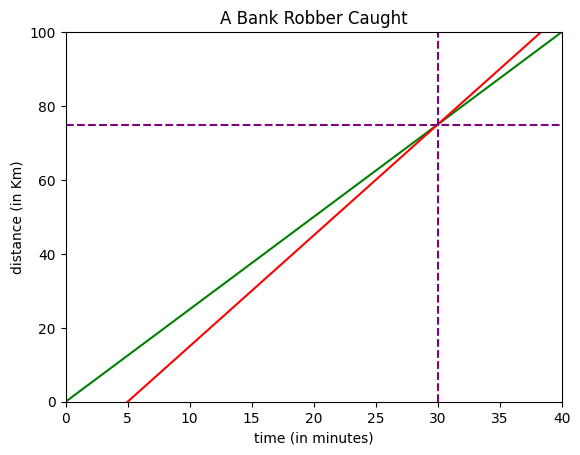

In [7]:
fig, ax = plt.subplots()
plt.title ('A Bank Robber Caught')
plt.xlabel('time (in minutes)')
plt.ylabel('distance (in Km)')

ax.set_xlim([0,40])
ax.set_ylim([0,100])

ax.plot(t , d_r , c = 'green')
ax.plot(t, d_s , c = 'red')

plt.axvline(x=30, color='purple', linestyle='--')
_ = plt.axhline(y=75, color='purple', linestyle='--')


# Scalars (Rank 0 Tensors) in Base Python

In [1]:
x = 30

# check the type
type (x) # if we'd like more specificity (e.g., int16, uint8), we need NumPy or another numeric library


int

In [2]:
y = 30

int

In [9]:
py_sum = x + y
py_sum

60

In [10]:
type(py_sum)

int

In [11]:
x_float = 23.20
float_sum = x_float + y
float_sum

53.2

In [12]:
type(float_sum)

float

Scalars in PyTorch


---


PyTorch and TensorFlow are the two most popular automatic differentiation libraries (a focus of the Calculus I and Calculus II subjects in the ML Foundations series) in Python, itself the most popular programming language in ML.
PyTorch tensors are designed to be pythonic, i.e., to feel and behave like NumPy arrays.
The advantage of PyTorch tensors relative to NumPy arrays is that they easily be used for operations on GPU (see here for example).
Documentation on PyTorch tensors, including available data types, is here.

In [13]:
import torch

In [14]:
x_pt = torch.tensor(25)
x_pt


tensor(25)

In [15]:
x_pt.shape

torch.Size([])

In [16]:
y_pt = torch.tensor(50)
y_pt

tensor(50)

In [17]:
y_pt.shape  # type specification optional, e.g.: dtype=torch.float16

torch.Size([])

In [18]:
sum_pt = x_pt + y_pt

sum_pt

tensor(75)

In [20]:

sum_pt.shape

torch.Size([])

In [21]:
type(sum_pt)


torch.Tensor

**Scalars in TensorFlow (version 2.0 or later)**

Tensors created with a wrapper, all of which you can read about here:

tf.Variable
tf.constant
tf.placeholder
tf.SparseTensor
Most widely-used is tf.Variable, which we'll use here.

As with TF tensors, in PyTorch we can similarly perform operations, and we can easily convert to and from NumPy arrays.

Also, a full list of tensor data types is available here.





In [26]:
import tensorflow as tf



In [27]:
x_tf = tf.Variable(25, dtype=tf.int16) # dtype is optional
x_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=25>

In [36]:
y_tf = tf.Variable(50, dtype=tf.int16)

y_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=50>

In [37]:
x_tf.shape

TensorShape([])

In [38]:
y_tf.shape

TensorShape([])

In [39]:
x_tf + y_tf

<tf.Tensor: shape=(), dtype=int16, numpy=75>

USING NUMPY INTERMS WITH TENSORFLOW

In [41]:
tf_sum = tf.add(x_tf, y_tf)
tf_sum

<tf.Tensor: shape=(), dtype=int16, numpy=75>

In [42]:
tf_sum.numpy() # note that NumPy operations automatically convert tensors to NumPy arrays, and vice versa



75

In [43]:
tf_float = tf.Variable(26.89)
tf_float

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=26.89>

In [44]:
x_tf_float = tf.Variable(100.10)
y_tf_float= tf.Variable(0.10)

x_tf_float + y_tf_float

<tf.Tensor: shape=(), dtype=float32, numpy=100.2>

Using numpy with tensorflow

In [45]:
tf_sum_float = tf.add(x_tf_float,y_tf_float)
tf_sum_float.numpy()

100.2

### Vectors (Rank 1 Tensors) in NumPy

In [48]:
import numpy as np

x = np.array([25, 6, 5]) # type argument is optional, e.g.: dtype=np.float16
x

array([25,  6,  5])

In [49]:
len(x) #. check the length

3

In [50]:
x.shape

(3,)

In [51]:
type(x)

numpy.ndarray

In [52]:
x[0] # zero index

25

In [53]:
type(x[0])

numpy.int64

### Vector Transposition

In [54]:
# Transposing a regular 1-D array has no effect...
x_t = x.T
x_t

array([25,  6,  5])

In [56]:
type(x_t)

numpy.ndarray

In [57]:
x_t.shape

(3,)

In [62]:
# .... but here we have to used nested "matrix -style" brackets
y = np.array([[25, 2, 5]])
y

array([[25,  2,  5]])

In [63]:
y.shape

(1, 3)

In [64]:
# ...but can transpose a matrix with a dimension of length 1, which is mathematically equivalent:
y_t = y.T
y_t

array([[25],
       [ 2],
       [ 5]])

In [65]:
y_t.shape # this is a column vector as it has 3 rows and 1 column

(3, 1)

In [66]:
# Column vector can be transposed back to original row vector:
# back to the orginal vector
y_t.T

array([[25,  2,  5]])

In [67]:
y_t.T.shape

(1, 3)

Another example sample:

In [81]:
b = np.array([[10,20,30,40]])
b_t = b.T
print (b)
b_t

print (b_t.shape)
print (type(b_t))
print (len(b_t))



[[10 20 30 40]]
(4, 1)
<class 'numpy.ndarray'>
4


In [87]:
print('Back to the orginal vector')

b_t.T
print ('--------------------')
print (b_t.T)
print ('--------------------')
print ( b_t.T.shape)
print ('--------------------')
print (type(b_t.T))
print ('--------------------')
print (len(b_t.T))

Back to the orginal vector
--------------------
[[10 20 30 40]]
--------------------
(1, 4)
--------------------
<class 'numpy.ndarray'>
--------------------
1


### Zero Vectors

Have no effect if added to another vector

In [ ]:
z = np.zeros(3)
z

array([0., 0., 0.])

### Vectors in PyTorch and TensorFlow

In [90]:
x_vector_pytorch = torch.tensor([25,7,9])
x_vector_pytorch

tensor([25,  7,  9])

In [91]:
x_vector_tensorflow = tf.Variable([35 , 0, 34])
x_vector_tensorflow


<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([35,  0, 34], dtype=int32)>